# Dataset CIFAR-10

In [113]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [89]:
#run on graphic card if possible
gpus = tf.config.list_physical_devices('GPU')
print("nb gpus", len(gpus))
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

nb gpus 1
1 Physical GPUs, 1 Logical GPU


In [114]:
# Explorez le dataset
print("x shape",x_train.shape)
print("y shape",y_train.shape)

x shape (50000, 32, 32, 3)
y shape (50000, 1)


In [115]:
# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

In [116]:
model_cnn = tf.keras.models.Sequential()
# first convolution layer (batch norm ==> conv 3x3 ==> max pool 2x2)
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(tf.keras.layers.Dropout(0.05))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
# add a second convolutional layer (same)
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(tf.keras.layers.Dropout(0.05))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
# add classifier
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dropout(0.5))
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Dropout(0.1))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [117]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model_epoch.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model_cnn.fit(x_train, y_train,batch_size=16, epochs=13, validation_data=(x_test, y_test),callbacks=callbacks_list)


Epoch 1/13
3125/3125 [==============================] - ETA: 0s - loss: 1.4431 - accuracy: 0.4916
Epoch 1: val_accuracy improved from -inf to 0.60860, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 25s 7ms/step - loss: 1.4431 - accuracy: 0.4916 - val_loss: 1.1231 - val_accuracy: 0.6086
Epoch 2/13
  17/3125 [..............................] - ETA: 20s - loss: 1.2836 - accuracy: 0.5846

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3124/3125 [============================>.] - ETA: 0s - loss: 1.1506 - accuracy: 0.5937
Epoch 2: val_accuracy improved from 0.60860 to 0.66480, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 21s 7ms/step - loss: 1.1505 - accuracy: 0.5937 - val_loss: 0.9595 - val_accuracy: 0.6648
Epoch 3/13
3122/3125 [============================>.] - ETA: 0s - loss: 1.0515 - accuracy: 0.6315
Epoch 3: val_accuracy improved from 0.66480 to 0.68620, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 22s 7ms/step - loss: 1.0513 - accuracy: 0.6316 - val_loss: 0.8983 - val_accuracy: 0.6862
Epoch 4/13
3124/3125 [============================>.] - ETA: 0s - loss: 0.9921 - accuracy: 0.6534
Epoch 4: val_accuracy improved from 0.68620 to 0.72040, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 21s 7ms/step - loss: 0.9920 - accuracy: 0.6534 - val_loss: 0.8157 - val_accuracy: 0.7204
Epoch 5/13
3120/3125 [===========

In [65]:
# save model if you want
model.save('model.keras')

1/1 [==============================] - 0s 19ms/step


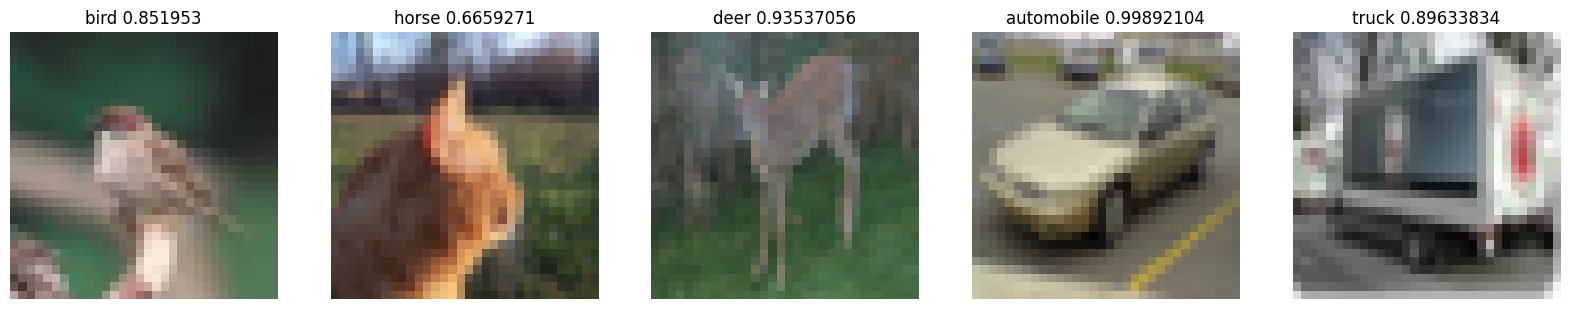

In [73]:
import matplotlib.pyplot as plt
import random

images = x_test[random.sample(range(0, len(x_test)), 5)]
# predict the class of each image
predictions = model_cnn.predict(images)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# show the images
fig = plt.figure(figsize=(20, 20))
for i in range(len(images)):
    fig.add_subplot(1, 5, (i+1)*1)
    plt.imshow(images[i])
    plt.axis('off')
    best = max(predictions[i])
    class_name = classes[list(predictions[i]).index(best)]
    plt.title(class_name+ " "+ str(best))